## Exercício 1

Suponha que voce seja o CEO de uma franquia de um restaurante e está considerando diferentes cidades para se abrir uma nova loja. A rede já possui _food-trucks_ em várias cidades e voce possui os dados dos lucros e do número da população das cidades. Você gostaria de usar essas dados para te ajudar a escolher qual cidade para expandir a sua rede. 

## Conhecendo os dados

O nosso _dataset_ contém os dados da população da cidade e o respectivo lucro em tal (uma valor negativo significa perda). Vamos ver como se comporta.

In [3]:
import pandas as pd

In [4]:
data1 = pd.read_csv('ex1data1.txt', header = None,names = ['population', 'profit'] )

In [5]:
data1.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [6]:
data1.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  97 non-null     float64
 1   profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


Como vimos, temos 97 diferentes cidades com seus respectivos lucros ou perdas. Vejamos como se comporta graficamente.

In [8]:
import seaborn as sns

In [9]:
sns.set()

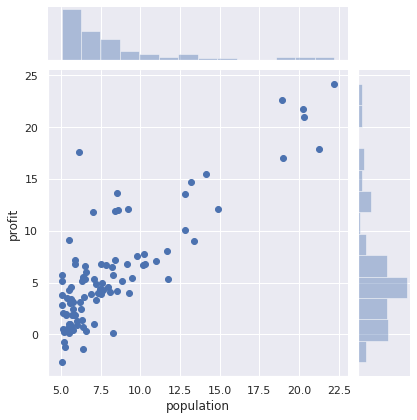

In [10]:
sns.jointplot('population','profit', data = data1)

Nosso palpite inicial é que quanto mais habitantes houver na cidade, maior tende a ser o lucro do _food truck_. Vejamos se esse palpite é consistente.

Para isso, utilizaremos um algoritmo de regressão linear, utilizando o método dos mínimos quadrados, isto é, após definirmos uma função custo, iremos minimizá-la, para obter os parâmetros de uma reta que melhor se aproxima dos pontos dados. 

In [11]:
data1.insert(0,'ones',1)

In [42]:
X = data1.iloc[:, [col for col in range(len(data1.columns) - 1)]]

In [13]:
X

,ones,population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598
...,...,...
92,1,5.8707
93,1,5.3054
94,1,8.2934
95,1,13.3940


In [14]:
y = data1.loc[:, [data1.columns[-1]] ]

In [15]:
y

,profit
0,17.59200
1,9.13020
2,13.66200
3,11.85400
4,6.82330
...,...
92,7.20290
93,1.98690
94,0.14454
95,9.05510


Basicamente, o que iremos fazer é construir uma reta do tipo 
$$h_\theta(X) = \theta_0 + \theta_1X$$
que melhor se aproxima dos pontos $(X,y)$ exibidos no gráfico ao início. Para isso, precisaremos encontrar qual o valor dos parâmetros $\theta_0, \theta_1$, o que será realizado, minimizando a função
$$J(\theta) = \frac{1}{2*97}\sum_{i = 1}^{97}(h_\theta(X) - y)^2,$$
onde, $\theta = (\theta_0, \theta_1)$.
Esse procedimento será feito usando o método do _gradient descend_, que consiste em repetir até a convergência 
$$\left\{\theta_j \leftarrow \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}\right\}$$

_Obs.: Mostra-se, matemáticamente, que dada a escolha adequada de $\alpha$, a convergência ocorrerá, pois a função $J(\theta)$ possui apenas um mínimo global e nenhum mínimo local._

In [16]:
import numpy as np

In [43]:
theta = np.zeros((X.columns.size,1))


In [44]:
theta

array([[0.],
       [0.]])

In [45]:
X = np.array(X)
y = np.array(y)

In [46]:
def computeCost(x,y,theta):
    quadrado = np.power(X.dot(theta) - y ,2)
    soma = np.sum(quadrado)
    return soma/(2*y.size)

In [47]:
computeCost(X,y,theta)

32.072733877455676

In [48]:
def gradientDescent(X,y,theta, alpha = 0.01, iters = 1000):
    cost = []
    for i in range(iters):
        theta_aux = []
        for j in range(theta.ravel().size):
            aux = (np.sum((X.dot(theta) - y)*X[:,[j]]))/y.size
            d = theta[j, 0] - alpha*aux
            theta_aux.append(d)
        theta_aux = np.array(theta_aux).reshape(theta.shape)
        theta = theta_aux
        c = computeCost(X,y,theta)
        cost.append(c)
    return cost, theta

In [49]:
cost, theta = gradientDescent(X,y,theta)

In [62]:
import matplotlib.pyplot as plt

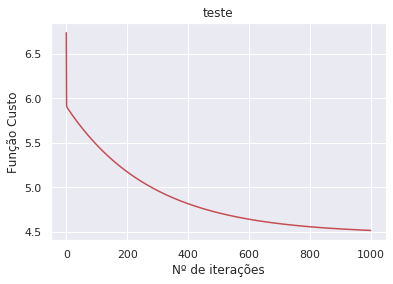

In [61]:
plt.plot([i for i in range(1000)], cost, color = 'r')
plt.title('teste')
plt.xlabel('Nº de iterações')
plt.ylabel('Função Custo')
plt.show()

Note então, à medida que iteramos o _Gradient Descent_, a função custo converge assintóticamente ao mínimo. Portanto, após a convergência dos nossos parâmetros, poderemos exibir a reta resultante desse processo.

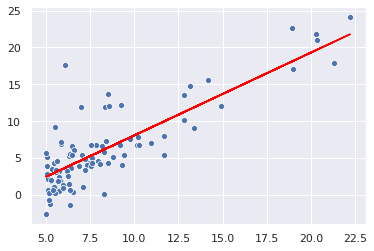

In [25]:
sns.scatterplot(X[:,1],y[:,0])
plt.plot(X[:,1],X.dot(theta), color = 'red')

Observe que, como previmos anteriormente, quanto maior for a populção da cidade, maior o lucro. Mais ainda, conseguiremos prever, dada uma população, quanto provávelmente, baseado em nossos dados, vamos obter de lucro.

## Usando a biblioteca _sklearn_

Ao invés de usarmos os métodos anteriores, podemos utilizar o métodos de regressão linear disponíveis na biblioteca _sklearn_. 

In [103]:
X = data1[['population']]

In [104]:
y = data1['profit']

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 101)

In [107]:
from sklearn.linear_model import LinearRegression

In [108]:
lm = LinearRegression()

In [109]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [110]:
lm.coef_

array([1.13963239])

In [111]:
lm.intercept_

-3.5478272717492016

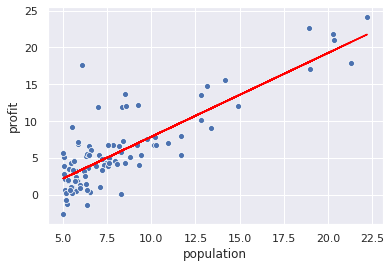

In [141]:
sns.scatterplot(X.iloc[:,0], y)
plt.plot(X.iloc[:,0], X*lm.coef_ + lm.intercept_, color = 'red')